In [2]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import datetime

In [ ]:
def fetch_stock_data(ticker, start_date, end_date):
    try:
        # Fetch the data using yfinance
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        return stock_data
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

# Example usage:
start_date = datetime.datetime(2019, 1, 1)
end_date = datetime.datetime.now()
ticker = "NVDA"

# Fetch data for NVDA using the function
NVDA = fetch_stock_data(ticker, start_date, end_date)

# Print the first few rows of the fetched data (if successful)
if NVDA is not None:
    print(NVDA.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          NVDA      NVDA      NVDA      NVDA       NVDA
Date                                                         
2019-01-02  3.377779  3.433819  3.224785  3.239415  508752000
2019-01-03  3.173704  3.351495  3.166265  3.317524  705552000
2019-01-04  3.377036  3.415222  3.216106  3.246854  585620000
2019-01-07  3.555818  3.592765  3.382986  3.434315  709160000
2019-01-08  3.467294  3.639630  3.394641  3.637398  786016000


In [3]:
NVDA = pd.read_csv("/content/nvidia_stock_data.csv")

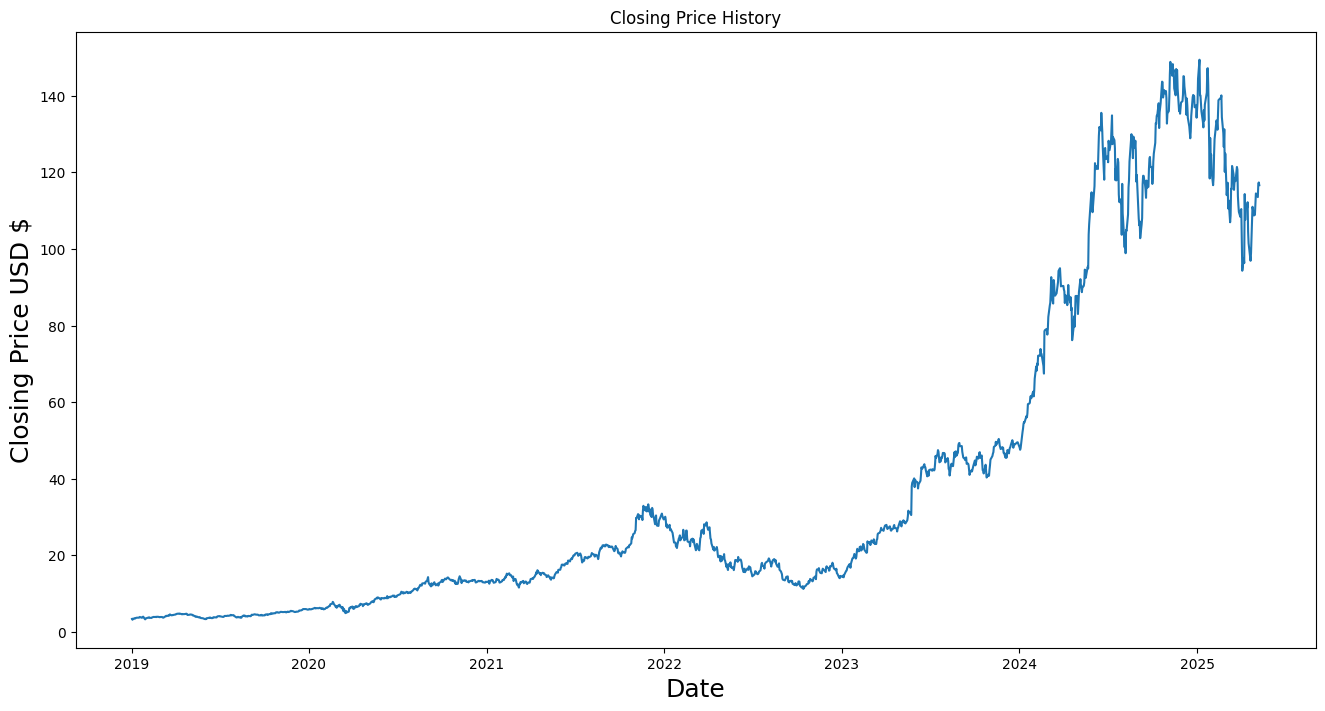

In [ ]:
#Visualization of the Closing
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(NVDA["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price USD $", fontsize=18)
plt.show()

In [4]:
#Create a new dataframe with only the Close Column
data = NVDA.filter(["Close"])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) #This is used to train 80% of the dataset

training_data_len

1280

In [6]:
# Ensure the dataset contains the "Close" column data
dataset = NVDA["Close"].values.reshape(-1, 1)

# Handle non-numeric values
# Step 1: Convert to numeric (ignore errors where the data is not number)
NVDA['Close'] = pd.to_numeric(NVDA['Close'], errors='coerce')

# Step 2: Remove rows with NaN values (or you can choose to impute them)
NVDA = NVDA.dropna()

# Re-extract values after data cleaning
dataset = NVDA["Close"].values.reshape(-1, 1)


# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00139546],
       [0.        ],
       [0.00139037],
       ...,
       [0.77874942],
       [0.78086922],
       [0.77594589]])

In [7]:
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train & y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00139546, 0.        , 0.00139037, 0.00261288, 0.00200756,
       0.00247385, 0.00292317, 0.00353358, 0.00380656, 0.00370992,
       0.00353527, 0.0040236 , 0.00490699, 0.0035234 , 0.00361157,
       0.00506129, 0.00545296, 0.00169897, 0.0006121 , 0.00159385,
       0.00267222, 0.00283839, 0.00359292, 0.00372348, 0.00424063,
       0.0032945 , 0.00342167, 0.00313003, 0.00393034, 0.00422029,
       0.00450005, 0.00497651, 0.00485782, 0.00518167, 0.0047103 ,
       0.00529019, 0.00520541, 0.00493582, 0.00464927, 0.00448123,
       0.00485294, 0.00490896, 0.00486483, 0.00410612, 0.00363257,
       0.0038668 , 0.00564898, 0.00588322, 0.00691857, 0.00639921,
       0.00712057, 0.0069746 , 0.00812198, 0.00789963, 0.00951887,
       0.0084258 , 0.0077944 , 0.00831886, 0.00825607, 0.00838338])]
[np.float64(0.008775449504181687)]

[array([0.00139546, 0.        , 0.00139037, 0.00261288, 0.00200756,
       0.00247385, 0.00292317, 0.00353358, 0.00380656, 0.00370992,
       0.00353527, 0.0

In [8]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape the data to a 3 dimensional shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1220, 60, 1)

In [9]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))#50 means the nod of input neurons
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))# Final output
#Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)#Batch size is the number of Batch per training, while epochs are the number of Iterations

Epoch 1/5
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 36s 27ms/step - loss: 6.9304e-04
Epoch 2/5
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - loss: 1.8525e-04
Epoch 3/5
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - loss: 1.1718e-04
Epoch 4/5
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - loss: 7.9022e-05
Epoch 5/5
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - loss: 1.0195e-04


In [11]:
#Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

#Convert the data to a numpy array
x_test = np.array(x_test)

#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
#Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


In [12]:
#Evaluate the model: Getting the root square error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

np.float64(0.77480278974809)

In [15]:
model.save('my_model.h5')